In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


test_labels = test_labels.reshape(-1,)
train_labels = train_labels.reshape(-1,)

170508288/170498071 [==============================] - 2s 0us/step


# Class A :

## NetA

The first neural network will be the simplest, in that it has no hidden layers. It should take the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.
There should be no non-linearities for this network and is just a very simple linear classifier.


In [54]:
class NetA:
  def net(self,X,Y,tX,tY):
    perc=models.Sequential([
                            layers.Flatten(input_shape=(32,32,3)),
                            layers.Dense(10)
    ])
    perc.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])
    perc.summary()
    #ann.fit(X,Y, epochs=10)  
    history = perc.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = perc.evaluate(tX, tY)
    
    y_pred=perc.predict(tX)
    return y_pred,history,acc


# Class B :

## NetB
The second neural network will be slightly more complicated in that it has a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:
* Flatten the image to a vector for the input
* Use a fully-connected linear layer with 300 hidden-neurons
* Use the ReLU activation function
* Use a fully-connected linear layer to the 10 outputs.

In [55]:
class NetB:

  def net(self,X,Y,tX,tY):
    ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

    ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    ann.summary()
    #ann.fit(X,Y, epochs=10)  
    history = ann.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = ann.evaluate(tX, tY)
    y_pred= ann.predict(tX)
    return y_pred,history,acc

# Class C :
## NetC
This third neural network will be a convolutional neural network. It should use the following
operations in this order:
* Use a convolution layer with kernel-width 5 and depth 25
* Use the ReLU activation function
* Use a max-pool operation with kernel-width 2 and stride 2
* Flatten the image to a vector for the next step's input
* Use a fully-connected linear layer to the 10 outputs.


In [56]:
class NetC:

    def net(self,x,y,tx,ty):
      model = models.Sequential()
      model.add(layers.Conv2D(32 , (5,5), activation='relu', input_shape=(32,32,3),padding="same"))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Flatten())
      model.add(layers.Dense(512))
      model.add(layers.Dense(10,activation="softmax"))
      model.summary()

      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

      history = model.fit(x, y, epochs=50, batch_size=100, 
                    validation_data=(tx, ty)) 
      acc = model.evaluate(tx, ty) 
      y_pred= model.predict(tx)
      return y_pred,history,acc




# Class D :
## NetD
This fourth neural network will be a convolutional neural network. It should use the following
operations in this order:
* Use two convolution layer, one with kernel-width 5 and depth 32 and
  second one with kernel-width 4 and depth 64.
* Use the ReLU activation function
* Use two max-pool operation with kernel-width 2 and stride 2
* Use a dropout operation with rate 0.2
* Flatten the image to a vector for the next step's input
* Use a fully-connected linear layer to the 10 outputs.

In [57]:
class NetD:

    def net(self,x,y,tx,ty):
      model = models.Sequential()
      model.add(layers.Conv2D(32 , (5,5), activation='relu', input_shape=(32,32,3),padding="same"))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Conv2D(64 , (4,4), activation='relu'))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Dropout(0.2))
      model.add(layers.Flatten())
      model.add(layers.Dense(512))
      model.add(layers.Dense(10,activation="softmax"))
      model.summary()

      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.009),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

      history = model.fit(x, y, epochs=50, batch_size=100, 
                    validation_data=(tx, ty)) 
      acc = model.evaluate(tx, ty) 
      y_pred= model.predict(tx)
      return y_pred,history,acc

# Class E :
## NetE
This fifth neural network will be a convolutional neural network. It retrains the ResNet-50 neural network. You can find out more about Keras' model zoo [here](https://keras.io/api/applications/).
* First, define a pre-trained ResNet-50. We could fine tune it, but we are going to re-train it since the labels are really similar.
* Flatten the outputs from ResNet-50.
* Use a fully-connected linear layer to classify between the 10 available classes.
* Use the Adam optimizer with a learning rate scheduler which decreases the learning rate if the neural network's performance gets worse.
* NOTE: This model seems to overfit on the training data. Further enhancements such as early stopping or different pretrained models are suggested for NetE.

In [51]:
class NetE:
  def net(self, x_data, y_data, tx, ty):
    x_input = layers.Input((32, 32, 3))
    # ResNet-50
    base_model = tf.keras.applications.ResNet50V2(weights = 'imagenet', include_top = False, input_tensor = x_input)
    # flatten ResNet's outputs
    x = layers.Flatten()(base_model.output)
    # fully connected layer to classify CIFAR-10's classes
    x = layers.Dense(10, activation = 'softmax')(x)
    # create model with inputs and outputs
    model = tf.keras.Model(inputs = x_input, outputs = x)
    # learning rate scheduler
    rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose = 1)
    # compile with Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(x_data, y_data, epochs=10, batch_size=32, # we are only going to train it for 10 epochs because of how heavy the model is
                    validation_data=(tx, ty), callbacks=[rlrop]) 
    acc = model.evaluate(tx, ty) 
    y_pred= model.predict(tx)
    return y_pred,history,acc

In [58]:
predA,hisA,aacA=NetA().net(train_images,train_labels,test_images,test_labels)   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 9.5138 - accuracy: 0.0991 - val_loss: 8.5789 - val_accuracy: 0.1027
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 9.1871 - accuracy: 0.0967 - val_loss: 8.6935 - val_accuracy: 0.1135
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 8.8628 - accuracy: 0.0979 - val_loss: 8.0689 - val_accuracy: 0.1106
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 8.6751

In [59]:
predB,hisB,accB=NetB().net(train_images,train_labels,test_images,test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8897 - accuracy: 0.3202 - val_loss: 1.7475 - val_accuracy: 0.3800
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7262 - accuracy: 0.3832 - val_loss: 1.6926 - val_accuracy: 0.3988
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6624 - accur

In [60]:
predC,hisC,accC=NetC().net(train_images,train_labels,test_images,test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_742 (Conv2D)          (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 4,202,378
Trainable params: 4,202,378
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 5s 9ms/step - loss: 1.9625 - accuracy: 0.3012 - val_loss

In [61]:
predD,hisD,accD=NetD().net(train_images,train_labels,test_images,test_labels)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_743 (Conv2D)          (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_744 (Conv2D)          (None, 13, 13, 64)        32832     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)              

In [52]:
predE,hisE,accE=NetE().net(train_images,train_labels,test_images,test_labels)

94683136/94668760 [==============================] - 1s 0us/step
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
__________________________

In [69]:
y_A = [np.argmax(element) for element in predA]
y_B= [np.argmax(element) for element in predB]
y_C=[np.argmax(element) for element in predC]
y_D=[np.argmax(element) for element in predD]
y_E=[np.argmax(element) for element in predE]

In [70]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plots for NetA :
* title - truth
* label - prediction 

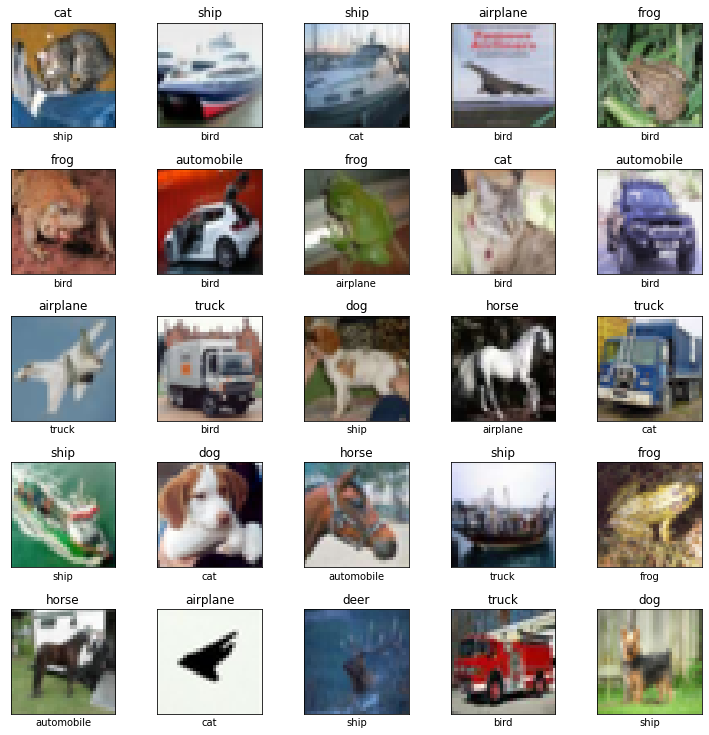

In [71]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_A[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetB :
* title - truth
* label - prediction 

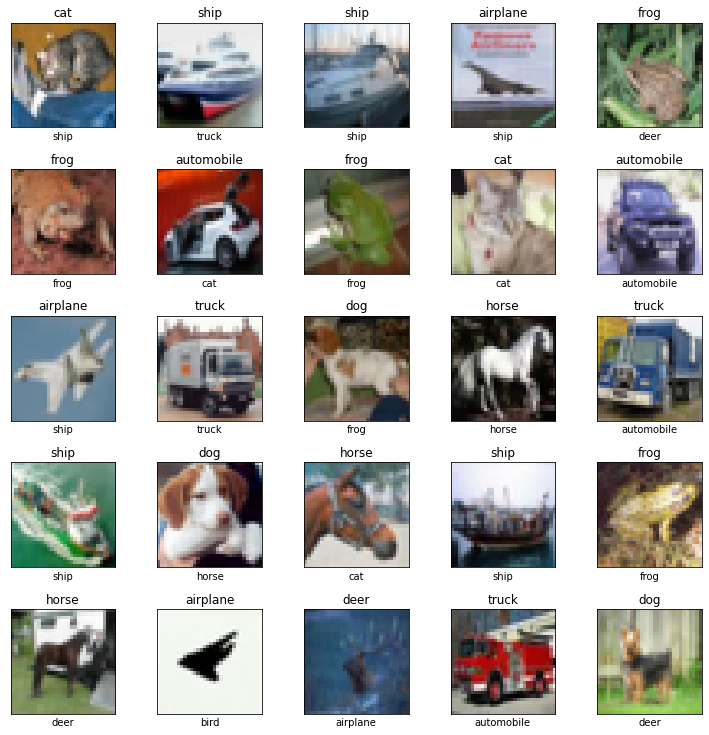

In [72]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_B[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetC :
* title - truth
* label - prediction 

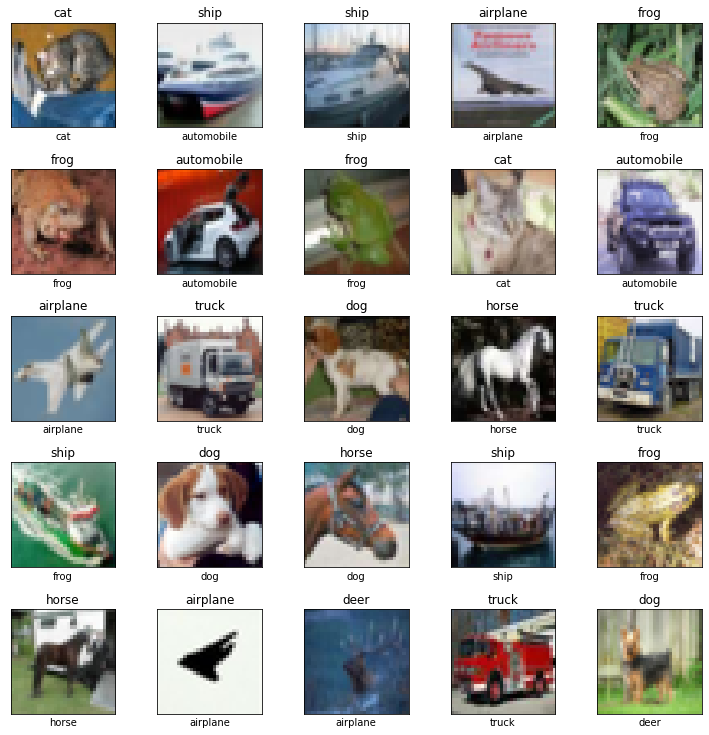

In [73]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_C[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Plot for NetD:


*   title - truth
*   label - prediction



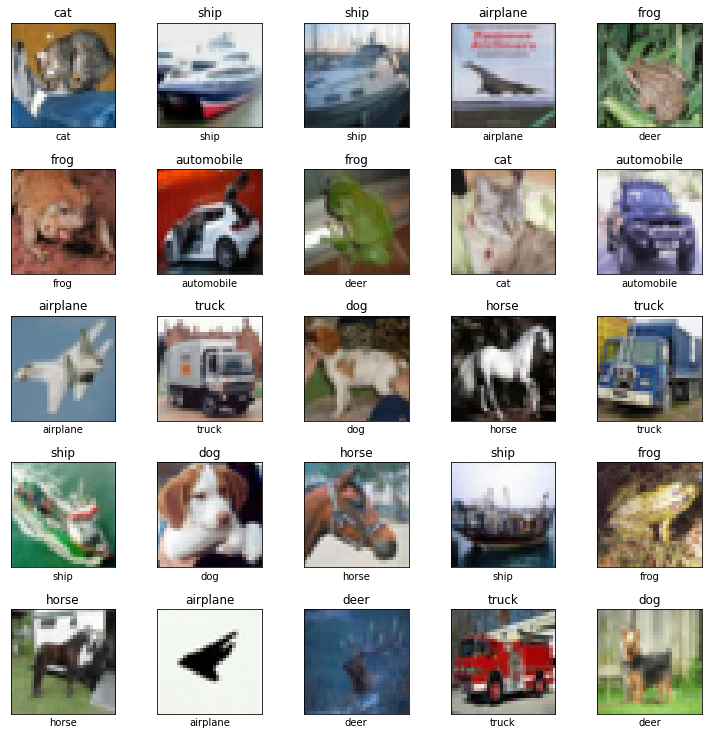

In [74]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetD")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_D[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Plot for NetE:


*   title - truth
*   label - prediction

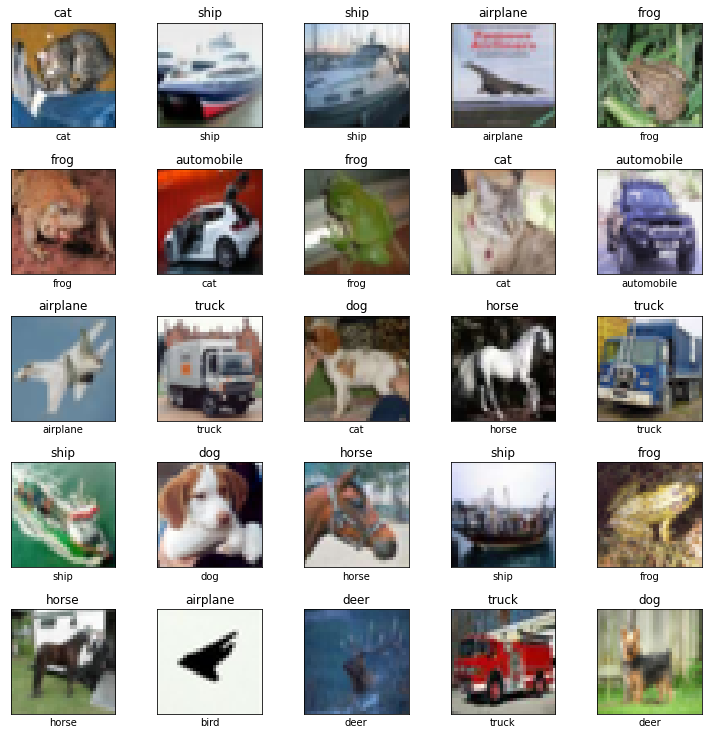

In [75]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetE")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_E[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Visualization and Accuracy :

<Figure size 432x288 with 0 Axes>

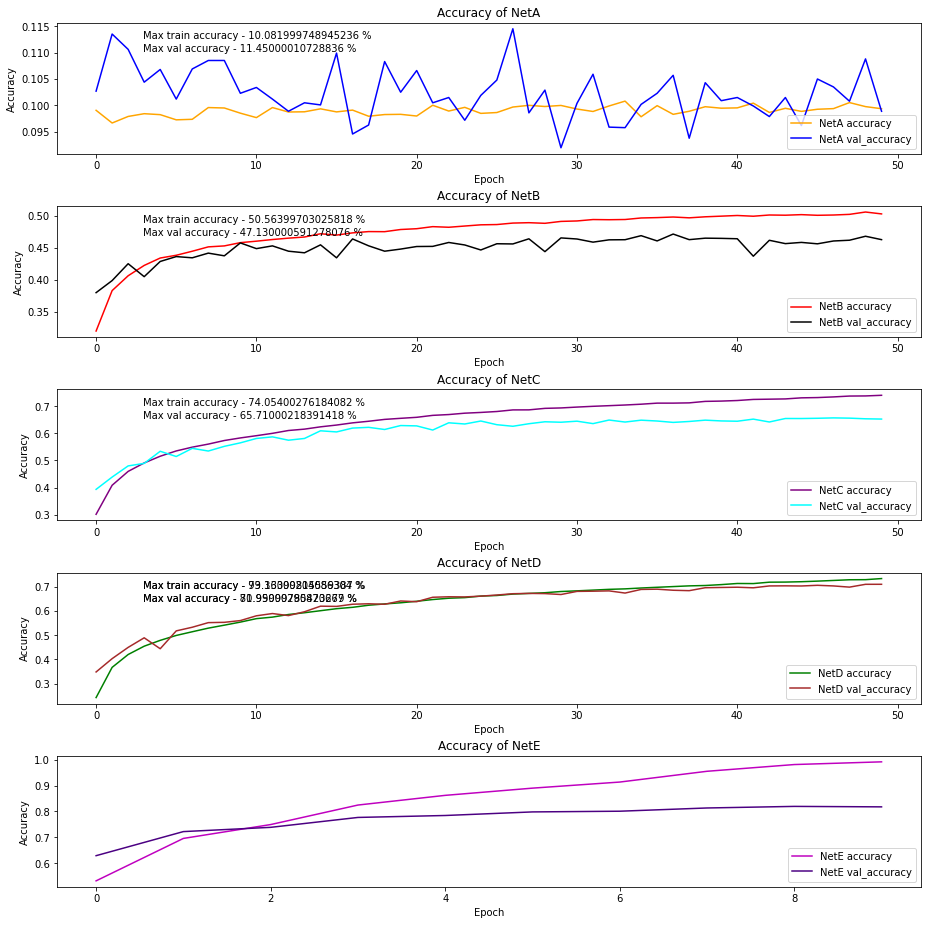

Test accuracy of NetA-  9.889999777078629 %
Test accuracy of NetB-  46.25999927520752 %
Test accuracy of NetC-  65.28000235557556 %
Test accuracy of NetD-  70.99999785423279 %
Test accuracy of NetE-  81.77000284194946 %


In [78]:

maxA=sorted(hisA.history['accuracy'],reverse=True)
acrA=str(maxA[0]*100)
maxB=sorted(hisB.history['accuracy'],reverse=True)
acrB=str(maxB[0]*100)
maxC=sorted(hisC.history['accuracy'],reverse=True)
acrC=str(maxC[0]*100)
maxD=sorted(hisD.history['accuracy'],reverse=True)
acrD=str(maxD[0]*100)
maxE=sorted(hisE.history['accuracy'],reverse=True)
acrE=str(maxE[0]*100)
maxAV=sorted(hisA.history['val_accuracy'],reverse=True)
acrAV=str(maxAV[0]*100)
maxBV=sorted(hisB.history['val_accuracy'],reverse=True)
acrBV=str(maxBV[0]*100)
maxCV=sorted(hisC.history['val_accuracy'],reverse=True)
acrCV=str(maxCV[0]*100)
maxDV=sorted(hisD.history['val_accuracy'],reverse=True)
acrDV=str(maxDV[0]*100)
maxEV=sorted(hisE.history['val_accuracy'],reverse=True)
acrEV=str(maxEV[0]*100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig, axs = plt.subplots(5, 1,figsize=(15,15))
axs[0].set_title("Accuracy of NetA")
axs[0].plot(hisA.history['accuracy'], label='NetA accuracy',color='orange')
axs[0].plot(hisA.history['val_accuracy'], label = 'NetA val_accuracy',color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].text(0.1,0.9,'Max train accuracy - '+acrA+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[0].text(0.1,0.8,'Max val accuracy - '+acrAV+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[1].set_title("Accuracy of NetB")
axs[1].plot(hisB.history['accuracy'], label='NetB accuracy',color='red')
axs[1].plot(hisB.history['val_accuracy'], label = 'NetB val_accuracy',color='black')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')
axs[1].text(0.1,0.9,'Max train accuracy - '+acrB+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[1].text(0.1,0.8,'Max val accuracy - '+acrBV+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[2].set_title("Accuracy of NetC")
axs[2].plot(hisC.history['accuracy'], label='NetC accuracy',color='purple')
axs[2].plot(hisC.history['val_accuracy'], label = 'NetC val_accuracy',color='cyan')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Accuracy')
axs[2].legend(loc='lower right')
axs[2].text(0.1,0.9,'Max train accuracy - '+acrC+' %', verticalalignment='center', transform=axs[2].transAxes)
axs[2].text(0.1,0.8,'Max val accuracy - '+acrCV+' %', verticalalignment='center', transform=axs[2].transAxes)
axs[3].set_title("Accuracy of NetD")
axs[3].plot(hisD.history['accuracy'], label='NetD accuracy',color='green')
axs[3].plot(hisD.history['val_accuracy'], label = 'NetD val_accuracy',color='brown')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Accuracy')
axs[3].legend(loc='lower right')
axs[3].text(0.1,0.9,'Max train accuracy - '+acrD+' %', verticalalignment='center', transform=axs[3].transAxes)
axs[3].text(0.1,0.8,'Max val accuracy - '+acrDV+' %', verticalalignment='center', transform=axs[3].transAxes)
axs[4].set_title("Accuracy of NetE")
axs[4].plot(hisE.history['accuracy'], label='NetE accuracy',color='m')
axs[4].plot(hisE.history['val_accuracy'], label = 'NetE val_accuracy',color='indigo')
axs[4].set_xlabel('Epoch')
axs[4].set_ylabel('Accuracy')
axs[4].legend(loc='lower right')
axs[4].text(0.1,0.9,'Max train accuracy - '+acrE+' %', verticalalignment='center', transform=axs[3].transAxes)
axs[4].text(0.1,0.8,'Max val accuracy - '+acrEV+' %', verticalalignment='center', transform=axs[3].transAxes)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)   
plt.show()
print("Test accuracy of NetA- ",aacA[1]*100,"%")
print("Test accuracy of NetB- ",accB[1]*100,"%")
print("Test accuracy of NetC- ",accC[1]*100,"%")
print("Test accuracy of NetD- ",accD[1]*100,"%")
print("Test accuracy of NetE- ",accE[1]*100,"%")